![](https://i.ibb.co/g9vR4GX/verti2.jpg)

   # Prueba de Álvaro Huete

## Importación de librerias

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import numpy as np
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError, PrecisionRecallCurve, ConfusionMatrix, ROCAUC
from yellowbrick.target import ClassBalance
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score

## Carga de datos

Disponemos de 3 datasets con datos relacionados con **accidentes de tráfico, heridos y vehículos** implicados en el accidente en **Reino Unido desde 2005 hasta 2015**.
En primer lugar, cargamos los datasets y vemos qué aspecto y dimensiones tienen. Así como el formato de las variables que contienen:

In [3]:
accidentes = pd.read_csv('C:/Users/asus/Desktop/Verti/Accidents0515.csv')

In [4]:
accidentes.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [9]:
accidentes.shape[0]

1780653

Se puede comprobar que cada fila del dataframe se corresponde de forma unívoca con un accidente:

In [8]:
accidentes.Accident_Index.nunique()

1780653

In [5]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 32 columns):
Accident_Index                                 object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                   int64
Accident_Severity                              int64
Number_of_Vehicles                             int64
Number_of_Casualties                           int64
Date                                           object
Day_of_Week                                    int64
Time                                           object
Local_Authority_(District)                     int64
Local_Authority_(Highway)                      object
1st_Road_Class                                 int64
1st_Road_Number                                int64
Road_Type                  

Vemos que la columna 'Date' tiene formato de string, por lo que lo convertimos a formato fecha, para poder analizar los datos de forma anual o mensual de una forma más eficiente creando una columna nueva para cada caso

In [6]:
accidentes['Date'] = pd.to_datetime(accidentes['Date'])
accidentes['year'] = accidentes.Date.apply(lambda x: x.year)
accidentes['month'] = accidentes.Date.apply(lambda x: x.month)
accidentes['day'] = accidentes.Date.apply(lambda x: x.day)

Realizamos el mismo prodecimiento para los otros dos dataframes, con la diferencia que ahora es necesario especificar un parámetro al leer los ficheros .CSV que no devuelva error aunque haya alguna línea del dataframe con formato erróneo:

In [ ]:
casualties = pd.read_csv('C:/Users/asus/Desktop/Verti/Casualties0515.csv', error_bad_lines=False)

In [22]:
casualties.shape

(2216720, 15)

In [21]:
casualties.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [13]:
casualties.Accident_Index.nunique()

1640597

In [ ]:
vehiculos = pd.read_csv('C:/Users/asus/Desktop/Verti/Vehicles0515.csv', error_bad_lines=False)

In [24]:
vehiculos.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


In [25]:
vehiculos.shape

(3004425, 22)

In [26]:
vehiculos.Accident_Index.nunique()

1640597

Como se puede ver, para un mismo accidente puede haber varios heridos y varios vehículos implicados. Además hay filas en el dataframe de accidentes que no tienen correspondencia en ninguno de los otros dos dataframes.

## Análisis exploratorio

A continuación, vamos a realizar un análisis exploratorio de las variables para estudiar la distribución de los datos y poder extraer algunas conclusiones sobre ellos mediante gráficos y tablas que nos permitan tomar decisiones sobre qué modelo es más apropiado y útil de cara a la toma de decisiones por parte de la compañía.

Como disponemos de información sobre las coordenadas geográficas de los accidentes, podemos  empezar creando un **mapa de calor** para ver las zonas donde se concentran la mayor parte de los accidentes. Por ejemplo, podemos restringir los datos para aquellos accidentes ocurridos en los **meses de verano** (Junio, Julio y Agosto) durante los años **2013, 2014 y 2015** en los cuales el conductor tenía una edad comprendida entre los **26 y los 35 años**, el vehículo era una **moto con mas de 500 CC** de capacidad y la **gravedad** del accidente fue **media**:

In [27]:
df = accidentes.merge(vehiculos, how='inner', on='Accident_Index')

Tomamos aquellos registros con coordenadas no nulas:

In [28]:
coord = df[~((df.Longitude.isna())|(df.Latitude.isna()))]

In [29]:
verano = coord[(coord.year.isin([2013, 2014, 2015])) & (coord.month.isin([6,7,8])) & (coord.Age_Band_of_Driver==6) & (coord.Vehicle_Type==5) & (coord.Accident_Severity==2)]

In [30]:
m = folium.Map(location=[52, -0.8], zoom_start=6.5, tiles='cartodbpositron')
heatmap = HeatMap(data=verano[["Latitude", "Longitude"]], radius=20).add_to(m)
m

Veamos el porcentaje de accidentes de cada tipo que hay:

In [41]:
t1 = accidentes.groupby('Accident_Severity').agg({'Accident_Index':'count'}).reset_index().rename(columns={'Accident_Index':'Accidents'})
print('Slight severity: {:.2f}%'.format(t1.iloc[2,1]/accidentes.shape[0]*100))
print('Serious severity: {:.2f}%'.format(t1.iloc[1,1]/accidentes.shape[0]*100))
print('Fatal severity: {:.2f}%'.format(t1.iloc[0,1]/accidentes.shape[0]*100))

Slight severity: 85.11%
Serious severity: 13.60%
Fatal severity: 1.29%


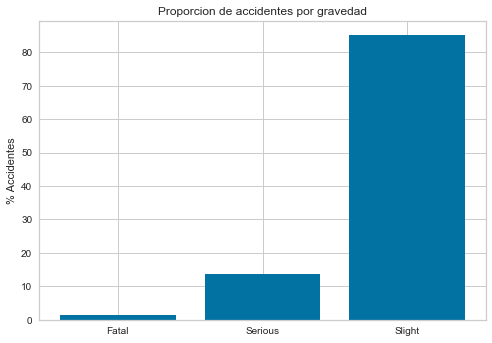

In [55]:
x=['Fatal','Serious','Slight']
y = [t1.iloc[0,1]/accidentes.shape[0]*100, t1.iloc[1,1]/accidentes.shape[0]*100, t1.iloc[2,1]/accidentes.shape[0]*100]
plt.bar(x, y)
plt.ylabel('% Accidentes')
plt.title('Proporcion de accidentes por gravedad')
plt.show()

Podemos comprobar que la muestra está muy **desbalanceada**, siendo la clase 'Slight' mucho mas frecuente que las otras dos. Ésto habrá que tenerlo en cuenta cuando vayamos a entrenar nuestro modelo para evitar sesgo.

Veamos la evolucion del porcentaje de accidentes de gravedad alta a lo largo de los años:

In [56]:
rr = pd.crosstab(accidentes.year, accidentes.Accident_Severity, normalize='columns')

Accident_Severity,1,2,3
year,,,
2005,0.126663,0.103391,0.112692
2006,0.127228,0.103049,0.106421
2007,0.118010,0.100471,0.102324
2008,0.101791,0.095510,0.095758
2009,0.089443,0.090867,0.092044
2010,0.075267,0.084435,0.087256
2011,0.078137,0.086690,0.084912
2012,0.071180,0.086339,0.081179
2013,0.069919,0.081064,0.077481


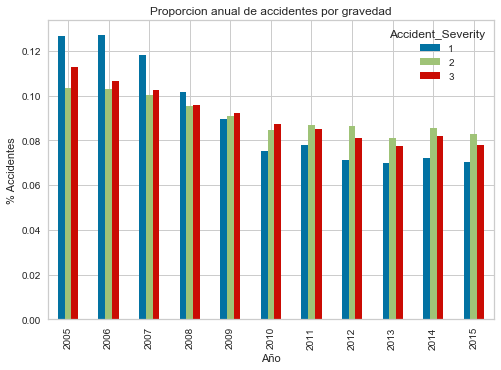

In [82]:
rr.plot.bar()
plt.ylabel('% Accidentes')
plt.xlabel('Año')
plt.title('Proporcion anual de accidentes por gravedad')
plt.show()

Vemos que en los 3 primeros años los accidentes graves eran los más frecuentes, y que esa tendencia ha ido **decreciendo con el paso de los años hasta ser los menos frecuentes**. También se podría analizar para un año determinado el porcentaje de accidentes por mes.

Veamos ahora la relación que hay entre la gravedad del accidente y algunas de las variables del dataframe correspondiente:

Tipo de carretera:

In [85]:
tc = pd.crosstab(accidentes.Road_Type, accidentes.Accident_Severity, normalize='columns')
tc

Accident_Severity,1,2,3
Road_Type,,,
1,0.015958,0.043713,0.071605
2,0.010740,0.019097,0.021038
3,0.201974,0.130796,0.149542
6,0.761631,0.794803,0.740618
7,0.006131,0.006915,0.011106
9,0.003566,0.004676,0.006091


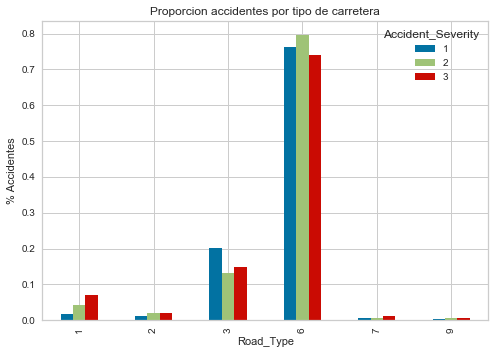

In [87]:
tc.plot.bar()
plt.ylabel('% Accidentes')
plt.title('Proporcion accidentes por tipo de carretera')
plt.show()

La mayor parte de los accidentes se producen en **vías de un solo carril**.

Media anual del número de vehículos y heridos por accidente:

In [88]:
accidentes.groupby('year').agg({'Number_of_Vehicles':'mean', 'Number_of_Casualties':'mean'})

,Number_of_Vehicles,Number_of_Casualties
year,,
2005,1.842836,1.363710
2006,1.840015,1.366053
2007,1.839310,1.360569
2008,1.826615,1.353559
2009,1.826229,1.358243
2010,1.822380,1.351225
2011,1.823118,1.346436
2012,1.826442,1.344519
2013,1.823980,1.324607


La mayor parte de accidentes graves se producen en **áreas rurales**:

In [89]:
pd.crosstab(accidentes.Urban_or_Rural_Area, accidentes.Accident_Severity, normalize='columns')

Accident_Severity,1,2,3
Urban_or_Rural_Area,,,
1,0.354205,0.580023,0.658406
2,0.645795,0.419898,0.341513
3,0.000000,0.000078,0.000082


La mayoría de accidentes graves se producen con **luz diurna**:

In [90]:
pd.crosstab(accidentes.Light_Conditions, accidentes.Accident_Severity, normalize='columns')

Accident_Severity,1,2,3
Light_Conditions,,,
1,0.586877,0.689950,0.741602
4,0.208105,0.215016,0.193254
5,0.006827,0.005126,0.004478
6,0.187625,0.079639,0.049719
7,0.010566,0.010269,0.010946


La mayoría de accidentes graves se producen con la condición meteorológica 1 (no aparecen las etiquetas en el archivo)

In [91]:
pd.crosstab(accidentes.Weather_Conditions, accidentes.Accident_Severity, normalize='columns')

Accident_Severity,1,2,3
Weather_Conditions,,,
-1,0.000130,0.000054,0.000096
1,0.827072,0.822893,0.795023
2,0.096313,0.105428,0.120583
3,0.004174,0.005011,0.007318
4,0.018871,0.014392,0.012797
5,0.015523,0.014268,0.014545
6,0.000652,0.001128,0.001333
7,0.009088,0.005746,0.005344
8,0.015001,0.017788,0.022773


La mayor parte de accidentes graves ocurren en zonas con un limite de velocidad de 60 km/h:

In [92]:
pd.crosstab(accidentes.Speed_limit, accidentes.Accident_Severity, normalize='columns')

Accident_Severity,1,2,3
Speed_limit,,,
0,0.000000,0.000000,6.598156e-07
10,0.000130,0.000008,9.237418e-06
15,0.000000,0.000004,9.897234e-06
20,0.005174,0.013120,1.235307e-02
30,0.330072,0.585546,6.547145e-01
40,0.093965,0.082229,8.196559e-02
50,0.055135,0.035645,3.207232e-02
60,0.384294,0.218886,1.455137e-01
70,0.131229,0.064561,7.336094e-02


No se aprecia una relación significativa entre la gravedad del accidente y el dia de la semana:

In [93]:
pd.crosstab(accidentes.Day_of_Week, accidentes.Accident_Severity, normalize='columns')

Accident_Severity,1,2,3
Day_of_Week,,,
1,0.159666,0.130027,0.105687
2,0.128229,0.135199,0.143571
3,0.128098,0.141205,0.151478
4,0.127315,0.141503,0.152554
5,0.131446,0.144601,0.151405
6,0.152622,0.159869,0.164392
7,0.172624,0.147596,0.130913


Podemos analizar tambien algunas variables del dataframe de los heridos en accidentes:

Gravedad de los heridos por género:

In [97]:
gender = pd.crosstab(casualties.Sex_of_Casualty, casualties.Casualty_Severity, normalize='columns')
gender

Casualty_Severity,1,2,3
Sex_of_Casualty,,,
-1,0.000043,0.000128,0.000307
1,0.748830,0.691432,0.567078
2,0.251127,0.308440,0.432615


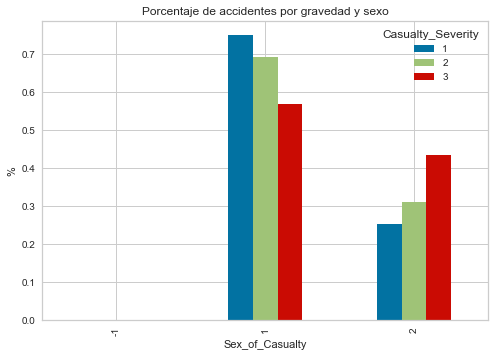

In [104]:
gender.plot.bar()
plt.ylabel('%')
plt.title('Porcentaje de accidentes por gravedad y sexo')
plt.show()

Los heridos de más gravedad son **hombres**.

Porcentaje de heridos por banda de edad y clase:

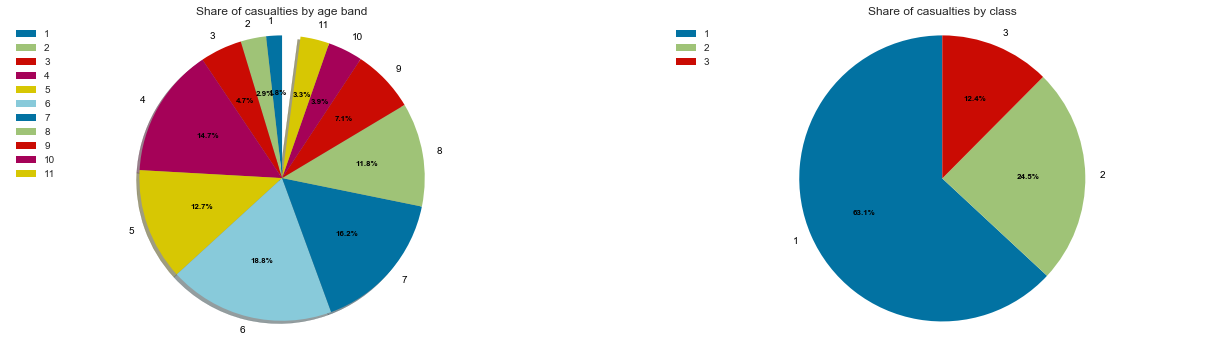

In [105]:
labels1 = list(range(1,12))
fracs1 = casualties[~casualties.Age_Band_of_Casualty.isin([-1])].groupby('Age_Band_of_Casualty').size().reset_index()
fracs1 = list(fracs1[0]/casualties.shape[0])


f,(ax1,ax2) = plt.subplots(1,2)

ws,texts, autotexts=ax1.pie(fracs1,labels=labels1, autopct='%1.1f%%', shadow=True, startangle=90,
                                textprops=dict(color="black"))

plt.setp(autotexts, size=8, weight="bold")

plt.legend(ws, labels1,
          title="ageRange",
          loc="center right",
          bbox_to_anchor=(0.95, 0, 1, 1))

ax1.axis('equal')
ax1.set_title("Share of casualties by age band")

labels2 = list(range(1,4))
fracs2 = casualties.groupby('Casualty_Class').size().reset_index()
fracs2 = list(fracs2[0]/casualties.shape[0])
#explode2 = (0, 0, 0)
ws,texts, autotexts=ax2.pie(fracs2, labels=labels2, autopct='%1.1f%%', shadow=False, startangle=90,
                                textprops=dict(color="black"))

plt.setp(autotexts, size=8, weight="bold")
plt.legend(ws, labels2,
          title="user_type",
          loc="center left",
          bbox_to_anchor=(0.95, 0, 1, 1))
ax2.axis('equal')
ax2.set_title("Share of casualties by class")

first_legend = ax1.legend(labels1, loc = 2)
second_legend = ax2.legend(labels2, loc = 2)
f.subplots_adjust(-0.1,0,2,0.8)
plt.show()

La mayoría de heridos pertenecen a la banda de edad de **26-35 años y la clase conductor**.

Veamos ahora los heridos de tipo viandante:

In [109]:
casualties[casualties.Casualty_Class==3].groupby('Pedestrian_Location').size().reset_index(name='total')

,Pedestrian_Location,total
0,-1,12
1,1,34248
2,2,1227
3,3,872
4,4,23528
5,5,131108
6,6,27851
7,7,1300
8,8,8166
9,9,28817


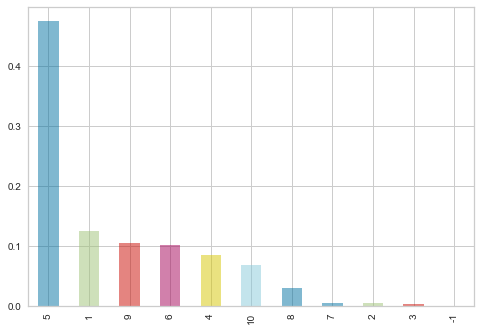

In [108]:
casualties[casualties.Casualty_Class==3].Pedestrian_Location.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.show()

La mayoria de viandantes heridos de gravedad estaban cruzando la via de forma incorrecta. Y cruzando por el lado del conductor:

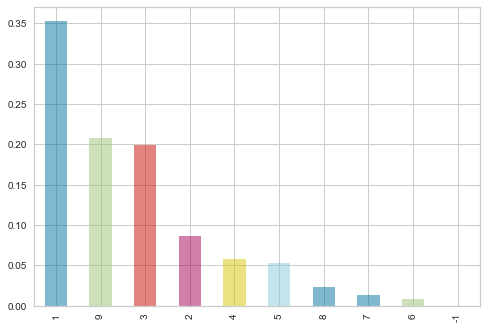

In [110]:
casualties[casualties.Casualty_Class==3].Pedestrian_Movement.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.show()

Analicemos ahora la relación entre las variables del dataframe de vehículos y la gravedad del accidente:

La mayoría de accidentes graves (19.4%) se producen en conductores con edades comprendidas entre los 36 y 45 años:

In [111]:
pd.crosstab(df.Age_Band_of_Driver, df.Accident_Severity, normalize='columns')

Accident_Severity,1,2,3
Age_Band_of_Driver,,,
-1,0.046898,0.084331,0.114669
1,0.000105,0.000327,0.000305
2,0.000945,0.002875,0.002901
3,0.003492,0.009398,0.007314
4,0.095633,0.105465,0.096296
5,0.114461,0.109949,0.112085
6,0.183468,0.188244,0.203559
7,0.194155,0.190023,0.190979
8,0.163669,0.148154,0.137608


El 62.9% de los accidentes graves se producen en **coches**:

In [113]:
pd.crosstab(df.Vehicle_Type, df.Accident_Severity, normalize='columns')

Accident_Severity,1,2,3
Vehicle_Type,,,
-1,0.000158,0.000088,0.000167
1,0.034425,0.078273,0.059217
2,0.004044,0.017263,0.011811
3,0.016306,0.040305,0.021012
4,0.013444,0.018337,0.007068
5,0.096500,0.075873,0.021175
8,0.012236,0.016612,0.017640
9,0.628916,0.635452,0.749712
10,0.004280,0.002968,0.002744


El 55.87% de los accidentes graves se producen cuando el vehículo está circulando hacia delante:

In [114]:
pd.crosstab(df.Vehicle_Manoeuvre, df.Accident_Severity, normalize='columns')

Accident_Severity,1,2,3
Vehicle_Manoeuvre,,,
-1,0.000394,0.000212,0.000380
1,0.007536,0.011959,0.014014
2,0.044324,0.042874,0.036739
3,0.013681,0.025171,0.074724
4,0.017042,0.036337,0.082309
5,0.014022,0.028678,0.039247
6,0.004858,0.008452,0.007348
7,0.012053,0.026331,0.033100
8,0.000735,0.002285,0.006067


En los accidentes graves, el **impacto fue frontal** el 59% de las ocasiones:

In [115]:
pd.crosstab(df['1st_Point_of_Impact'], df.Accident_Severity, normalize='columns')

Accident_Severity,1,2,3
1st_Point_of_Impact,,,
-1,0.001129,0.000206,0.000172
0,0.087336,0.077298,0.063740
1,0.590132,0.534651,0.482798
2,0.076386,0.097463,0.193105
3,0.134286,0.154128,0.137649
4,0.110732,0.136254,0.122536


Analicemos ahora la distribución de algunas variables mediante gráficos box-plot.

Se observa que en los accidentes graves, la edad del conductor es ligeramente inferior en hombres que en mujeres, en torno a 40 años:

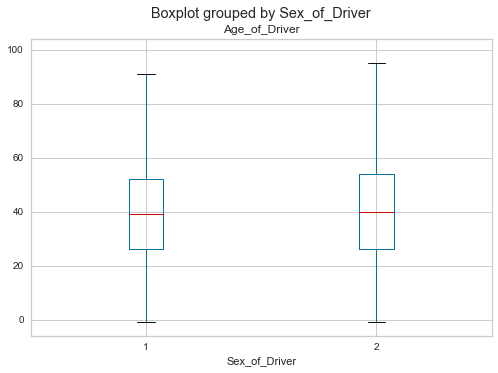

In [116]:
df.loc[(df.Accident_Severity ==1) & (df.Sex_of_Driver.isin([1,2]))].boxplot(column=['Age_of_Driver'], by='Sex_of_Driver')
plt.show()

Y que la **edad de los conductores** en los accidentes graves ha ido **aumentando** con el paso de los años:

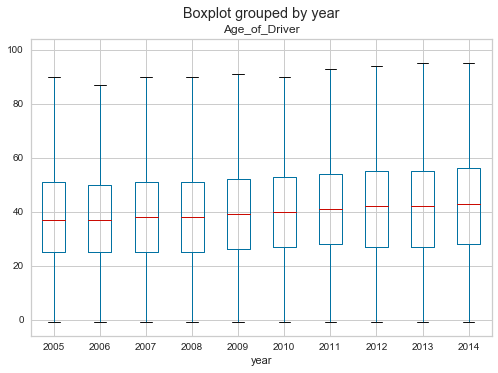

In [117]:
df.loc[(df.Accident_Severity ==1) & (df.Sex_of_Driver.isin([1,2]))].boxplot(column=['Age_of_Driver'], by='year')
plt.show()

Veamos ahora la función de densidad de probabilidad por gravedad del accidente para la edad del conductor, capacidad del motor y antigüedad del vehículo:

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


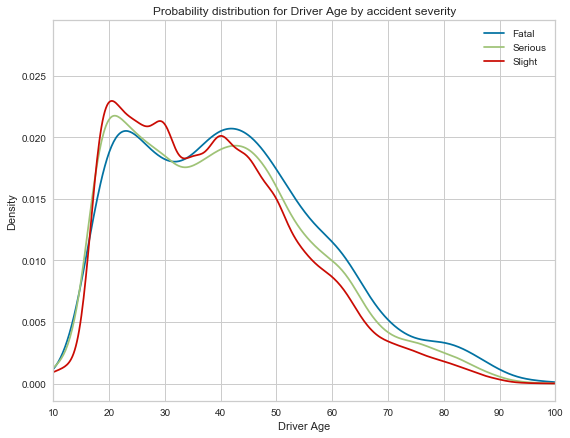

In [118]:
severities=[1, 2, 3]
fig = plt.figure(figsize=(9,7))

for severity in severities:
    df.loc[df.year == 2010][df.Accident_Severity == severity].Age_of_Driver.plot(kind='kde')
plt.legend(('Fatal', 'Serious', 'Slight'), loc=0)
plt.xlabel('Driver Age')
plt.ylabel('Density')
plt.grid(True)
plt.title('Probability distribution for Driver Age by accident severity')
plt.xlim(10, 100)
plt.show()

Se observan dos picos en la distribución, en torno a los 20 y 40 años. La probabilidad de accidente grave es mayor entorno a los **40 años**.

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


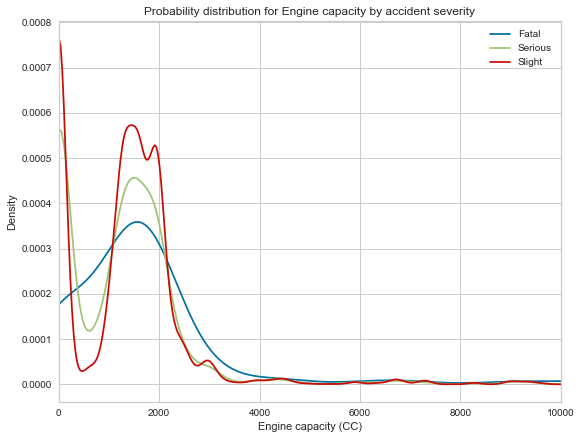

In [122]:
severities=[1, 2, 3]
fig = plt.figure(figsize=(9,7))

for severity in severities:
    df.loc[df.year == 2013][df.Accident_Severity == severity]['Engine_Capacity_(CC)'].plot(kind='kde')
plt.legend(('Fatal', 'Serious', 'Slight'), loc=0)
plt.xlabel('Engine capacity (CC)')
plt.ylabel('Density')
plt.grid(True)
plt.title('Probability distribution for Engine capacity by accident severity')
plt.xlim(0, 10000)
plt.show()

La mayoria de accidentes se dan en vehículos de entre 1000 y 2000 cc de capacidad en el motor.

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


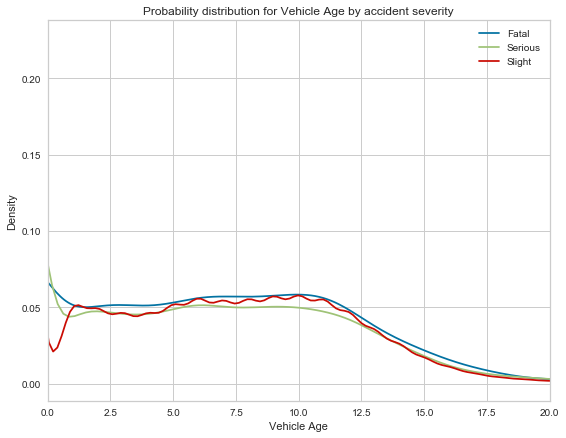

In [123]:
severities=[1, 2, 3]
fig = plt.figure(figsize=(9,7))

for severity in severities:
    df.loc[df.year == 2013][df.Accident_Severity == severity]['Age_of_Vehicle'].plot(kind='kde')
plt.legend(('Fatal', 'Serious', 'Slight'), loc=0)
plt.xlabel('Vehicle Age')
plt.ylabel('Density')
plt.grid(True)
plt.title('Probability distribution for Vehicle Age by accident severity')
plt.xlim(0, 20)
plt.show()

En general, se puede observar que la probabilidad de accidente disminuye cuando el vehículo tiene mas de **10 años de antigüedad.**

## Diseño del modelo

Dado que disponemos de información diaria de los accidentes desde 2005 a 2015, podríamos emplear un modelo **ARIMA** para realizar predicciones sobre el número de accidentes en una fecha futura.

Representamos la serie temporal:

In [125]:
seriest = accidentes[(accidentes.Accident_Severity.isin([1,2]))&(accidentes.year.isin([2012,2013]))].groupby('Date').size().reset_index(name='accidentes')
seriest = seriest.set_index('Date')

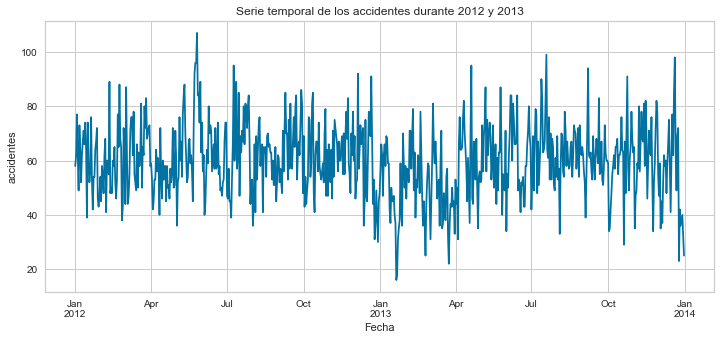

In [127]:
fig = plt.figure(figsize=(12,5))
seriest.accidentes.plot()
plt.ylabel('accidentes')
plt.xlabel('Fecha')
plt.title('Serie temporal de los accidentes durante 2012 y 2013')
plt.show()

Comprobaríamos que la serie es **estacionaria, sin tendencia** y que el número de accidentes diarios sigue, aproximadamente, una **distribución normal** centrada en 60:

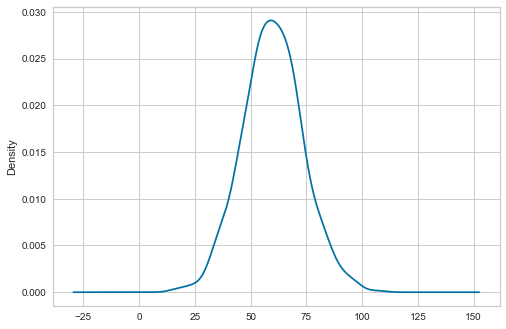

In [128]:
seriest.accidentes.plot.kde()
plt.show()

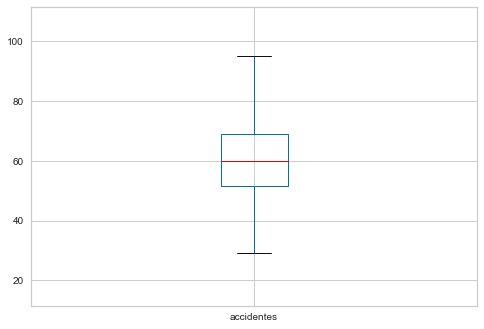

In [131]:
seriest.boxplot()
plt.show()

Una vez comprobada la estacionariedad de la serie, tendríamos que hallar el tipo de modelo que mejor se ajusta a los datos utilizando la **función de autocorrelación parcial** y observando el comportamiento de los **retardos**:

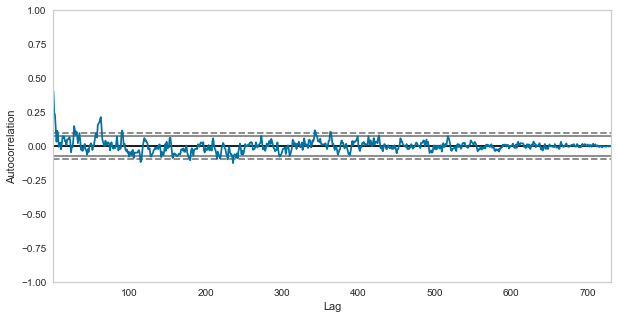

In [129]:
fig = plt.figure(figsize=(10,5))
autocorrelation_plot(seriest.accidentes)
plt.show()

Se observa que la función de autocorrelación decrece lentamente hacia cero, aproximadamente con exponenciales atenuados y ondas sinusoidales por lo que tendríamos que hallar un modelo **ARIMA (p,d,q).**

Sin embargo, en este caso nos vamos a centrar en un modelo de **clasificación** empleando un **Random Forest** para clasificar la **gravedad de los accidentes** utilizando unas determinadas variables del dataframe.

### Tratamiento de missings y outliers

Seleccionamos las variables de cada dataframe y vemos cual es la forma correcta de tratar los datos nulos y los atípicos.

Para las variables categorizadas, vemos que el porcentaje de observacion con datos missings es no significativo por lo que se puede eliminar sus filas del dataframe sin problema.

In [152]:
ds1 = accidentes[['Accident_Index','year', 'Number_of_Vehicles', 'Number_of_Casualties', 'Road_Type', 'Speed_limit', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Junction_Control', 'Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities', 'Accident_Severity']]

Para las variables continuas definimos los **outliers** como aquellos valores que son superiores al **Q3 + 1.5x*(Rango Intercuartílico)*.** En las variables categorizadas no tiene sentido hablar de outliers.

In [134]:
ds1[['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit']].describe()

,Number_of_Vehicles,Number_of_Casualties,Speed_limit
count,1.780653e+06,1.780653e+06,1.780653e+06
mean,1.832064e+00,1.349454e+00,3.902833e+01
std,7.148732e-01,8.237479e-01,1.415857e+01
min,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,3.000000e+01
50%,2.000000e+00,1.000000e+00,3.000000e+01
75%,2.000000e+00,1.000000e+00,5.000000e+01
max,6.700000e+01,9.300000e+01,7.000000e+01


In [153]:
ds1_cleaned = ds1[(ds1.Weather_Conditions!=-1)&(ds1.Road_Surface_Conditions!=-1)&(ds1.Carriageway_Hazards!=-1)&(ds1['Pedestrian_Crossing-Human_Control']!=-1)&(ds1['Pedestrian_Crossing-Physical_Facilities']!=-1)&(ds1.Junction_Control!=-1)]

Del dataframe de vehículos seleccionamos las variables de edad del conductor, antigüedad del vehículo, punto de colisión, tipo de vehículo y capacidad del motor:

In [174]:
ds2 = vehiculos[['Accident_Index', 'Age_of_Driver', 'Age_of_Vehicle', 'Engine_Capacity_(CC)', '1st_Point_of_Impact', 'Vehicle_Type']]

In [137]:
ds2[['Age_of_Driver', 'Age_of_Vehicle', 'Engine_Capacity_(CC)']][(ds2.Age_of_Driver>0)&(ds2.Age_of_Vehicle>0)&(ds2['Engine_Capacity_(CC)']>0)].describe()

,Age_of_Driver,Age_of_Vehicle,Engine_Capacity_(CC)
count,1.967520e+06,1.967520e+06,1.967520e+06
mean,3.916419e+01,7.191146e+00,1.909125e+03
std,1.591087e+01,4.492668e+00,1.710781e+03
min,4.000000e+00,1.000000e+00,1.000000e+00
25%,2.600000e+01,4.000000e+00,1.298000e+03
50%,3.700000e+01,7.000000e+00,1.598000e+03
75%,4.900000e+01,1.000000e+01,1.994000e+03
max,1.000000e+02,1.110000e+02,9.999900e+04


Para el caso de edad del conductor se considera outlier aquellas por encima de 85 años, para capacidad del motor aquellas superiores a 4000 CC y para antigüedad del vehiculo aquellos superiores a 20 años.

In [182]:
ds2_cleaned = ds2[(ds2.Age_of_Driver<85) & (ds2.Age_of_Vehicle<20) & (ds2['Engine_Capacity_(CC)']<4000)&(ds2.Age_of_Driver>0)&(ds2.Age_of_Vehicle>=0)&(ds2['Engine_Capacity_(CC)']>0)]

Definimos mediante la técnica de one hot encoding las variables binarias de si hubo impacto frontal o no, y si el vehículo es moto, coche u otro tipo:

In [183]:
ds2_cleaned['front_impact'] = np.where(ds2_cleaned['1st_Point_of_Impact'].isin([1]), 1, 0)
ds2_cleaned['motorcycle'] = np.where(ds2_cleaned.Vehicle_Type.isin([2,3,4,5,22,23,97]), 1, 0)
ds2_cleaned['car'] = np.where(ds2_cleaned.Vehicle_Type.isin([8, 9]), 1, 0)
ds2_cleaned['other_vehicle'] = np.where(~ds2_cleaned.Vehicle_Type.isin([2,3,4,5,22,23,97,8,9,-1]), 1, 0)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

Agrupamos por accidente y calculamos la media para las variables continuas y el máximo para las binarias:

In [184]:
ds3 = ds2_cleaned.groupby('Accident_Index').agg({'Age_of_Driver':'mean', 'Age_of_Vehicle':'mean', 'Engine_Capacity_(CC)':'mean', 'front_impact':'max', 'motorcycle':'max', 'car':'max', 'other_vehicle':'max'}).reset_index()

Para el dataframe de heridos procedemos de forma análoga, seleccionando la variable de edad de los heridos:

In [139]:
ds4 = casualties[['Age_of_Casualty', 'Accident_Index']]

In [140]:
ds4[['Age_of_Casualty']].describe()

,Age_of_Casualty
count,2.216720e+06
mean,3.435309e+01
std,1.885804e+01
min,-1.000000e+00
25%,2.000000e+01
50%,3.100000e+01
75%,4.600000e+01
max,1.030000e+02


Para la edad de los heridos se considera atípico aquéllas por encima de 63 años.

In [141]:
ds4_cleaned = ds4[(ds4.Age_of_Casualty<63)&(ds4.Age_of_Casualty>0)]
ds5 = ds4_cleaned.groupby('Accident_Index').agg({'Age_of_Casualty':'mean'}).reset_index()

Unimos todos los datasets para tener una única fuente de datos para el modelo:

In [185]:
data = ds1_cleaned.merge(ds3, how='inner', on='Accident_Index')
data2 = data.merge(ds5, how='inner', on='Accident_Index')
data2.shape

(764521, 23)

Éstas son las variables que vamos a utilizar en el modelo, excepto Accident_Index, year y Accident_Severity que es la columna de labels.

In [186]:
data2.columns

Index(['Accident_Index', 'year', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Road_Type', 'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
       'Junction_Control', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Accident_Severity',
       'Age_of_Driver', 'Age_of_Vehicle', 'Engine_Capacity_(CC)',
       'front_impact', 'motorcycle', 'car', 'other_vehicle',
       'Age_of_Casualty'],
      dtype='object')

Otro tratamiento que habría que realizar sobre las variables sería la normalización, pero en este caso al ser un Random Forest la escala de los datos es indiferente para los resultados del modelo.

Veamos la correlación entre las variables, por si pudiéramos suprimir alguna al tener correlación alta con respecto a otra:

In [187]:
data2.corr('pearson')

,year,Number_of_Vehicles,Number_of_Casualties,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Carriageway_Hazards,Urban_or_Rural_Area,...,Pedestrian_Crossing-Physical_Facilities,Accident_Severity,Age_of_Driver,Age_of_Vehicle,Engine_Capacity_(CC),front_impact,motorcycle,car,other_vehicle,Age_of_Casualty
year,1.000000,-0.012360,-0.014202,-0.006204,-0.068672,-0.006142,-0.021357,-0.012679,-0.008403,-0.040448,...,0.057351,0.000392,0.066590,0.123387,-0.007576,0.009436,0.022692,-0.003767,0.009148,0.043256
Number_of_Vehicles,-0.012360,1.000000,0.211716,-0.013544,0.079064,-0.085477,-0.014247,-0.035792,-0.038238,0.051568,...,-0.051325,0.068066,0.049027,-0.026313,0.057070,0.062945,-0.023638,0.113182,0.079582,0.142312
Number_of_Casualties,-0.014202,0.211716,1.000000,0.018207,0.112774,0.033019,-0.004977,0.018440,-0.001483,0.094572,...,-0.013997,-0.074677,-0.003652,0.018005,0.082193,0.104868,-0.139056,0.091782,0.018434,-0.035840
Road_Type,-0.006204,-0.013544,0.018207,1.000000,-0.155070,-0.005740,-0.005354,0.007218,0.008240,-0.048384,...,-0.051747,-0.039898,0.000715,0.026213,-0.011789,0.052629,0.020310,-0.001862,0.006583,-0.053302
Speed_limit,-0.068672,0.079064,0.112774,-0.155070,1.000000,0.036194,0.013292,0.067608,0.032468,0.653055,...,-0.172901,-0.074049,0.011262,-0.015407,0.049555,0.038957,-0.032379,0.002639,0.043368,0.083393
Light_Conditions,-0.006142,-0.085477,0.033019,-0.005740,0.036194,1.000000,0.110888,0.184447,0.036793,0.015535,...,0.018952,-0.055995,-0.117837,0.035856,-0.004490,0.034690,-0.022719,0.032555,-0.057250,-0.056228
Weather_Conditions,-0.021357,-0.014247,-0.004977,-0.005354,0.013292,0.110888,1.000000,0.307953,0.007508,0.014938,...,-0.017653,0.025749,-0.023711,0.007906,0.002845,-0.000556,-0.030075,0.015530,-0.009554,0.002475
Road_Surface_Conditions,-0.012679,-0.035792,0.018440,0.007218,0.067608,0.184447,0.307953,1.000000,0.011504,0.067166,...,-0.026656,0.016181,-0.042632,0.012855,-0.000293,0.041745,-0.043653,0.018756,-0.000557,0.004130
Carriageway_Hazards,-0.008403,-0.038238,-0.001483,0.008240,0.032468,0.036793,0.007508,0.011504,1.000000,0.030267,...,-0.005884,-0.003410,-0.014681,-0.001156,-0.005856,0.005331,0.002770,-0.017999,-0.000837,-0.005734
Urban_or_Rural_Area,-0.040448,0.051568,0.094572,-0.048384,0.653055,0.015535,0.014938,0.067166,0.030267,1.000000,...,-0.209993,-0.071560,0.026089,-0.003504,0.038113,0.047141,-0.022338,-0.000285,0.040090,0.071327


Veamos la proporción por gravedad de accidente que tenemos en nuestro dataframe del modelo:

In [188]:
shares = data2.groupby('Accident_Severity').size().reset_index(name='Accidents share')
shares['Accidents share'] = shares['Accidents share']/data2.shape[0]
shares

,Accident_Severity,Accidents share
0,1,0.007779
1,2,0.114353
2,3,0.877869


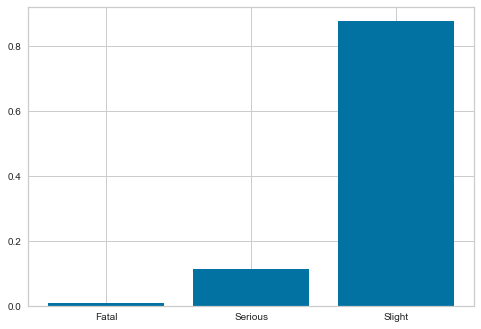

In [192]:
plt.bar(['Fatal','Serious','Slight'], shares['Accidents share'])
plt.show()

Como vimos al principio de la prueba, los datos de la gravedad del accidente están muy desbalanceados, siendo más del 87% accidentes leves. Por este motivo, tenemos que coger una **muestra menor de la clase mayoritaria** (accidente leve) y ponderar las observaciones de esta muestra con un **peso proporcional al bajomuestreo realizado.**

Con esto conseguimos que durante el entrenamiento veamos de forma más **frecuente la clase minoritaria** lo que ayuda al modelo a **converger antes**. Y por otro ahorramos espacio en disco al tener menos observaciones con más peso y podemos **almacenar más observaciones de la clase minoritaria.**

Por tanto, en primer lugar tomamos una **muestra aleatoria** que contenga aproximadamente el **20% de las observaciones de accidentes leves** y lo concatenamos con las demás observaciones:

In [193]:
d1 = data2[data2.Accident_Severity==3].sample(n=130000)

In [194]:
downsample = pd.concat([d1, data2[data2.Accident_Severity.isin([1, 2])]])

Definimos nuestro conjunto de observaciones y el vector con las etiquetas para clasificar (Fatal , Serious o Slight) y spliteamos en conjuntos de **training (80%) y test (20%):**

In [196]:
X = downsample.drop(columns=['year', 'Accident_Index', 'Accident_Severity']).values
y = downsample['Accident_Severity'].values

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Así quedarían el número de observaciones de cada clase en el conjunto de entrenamiento:

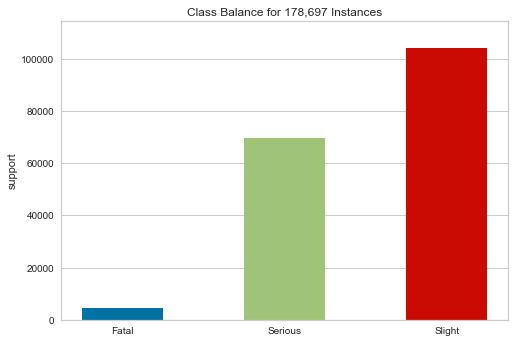

In [204]:
visualizer = ClassBalance(labels=["Fatal", "Serious", "Slight"])

visualizer.fit(y_train)        
visualizer.show()   

Utilizaremos 100 árboles y el criterio de Gini como métrica de calidad de cada spliteo y la ponderación para cada clase:

In [206]:
clf = RandomForestClassifier(n_estimators=100, criterion= 'gini', random_state = 42, class_weight={1:1, 2:.6, 3:20})
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Podemos visualizar diversas métricas de la clasificación:

Matriz de confusión:

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


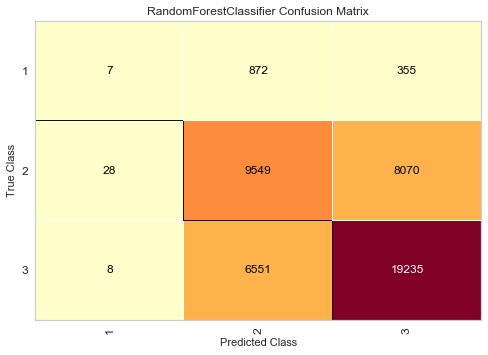

In [207]:
cm = ConfusionMatrix(clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

Precision, Recall y F1 score ponderado por clase:

In [209]:
print('Precision {:.3f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall {:.3f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1 score {:.3f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('Balanced accuracy: {:.3f}'.format(balanced_accuracy_score(y_test, y_pred)))

Precision 0.628
Recall 0.644
F1 score 0.634
Balanced accuracy: 0.431


Curva ROC para cada clase:

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


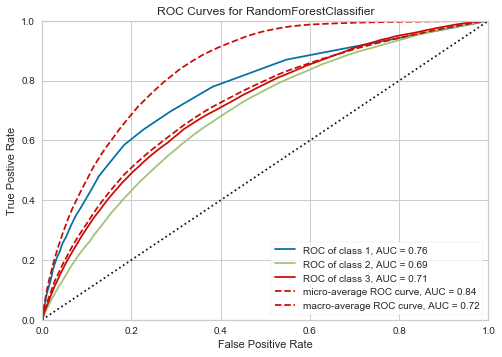

In [210]:
visualizer = ROCAUC(clf)
visualizer.fit(X_train, y_train)    
visualizer.score(X_test, y_test)        
visualizer.show()

Y el número de observaciones mal clasificadas para cada clase:

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


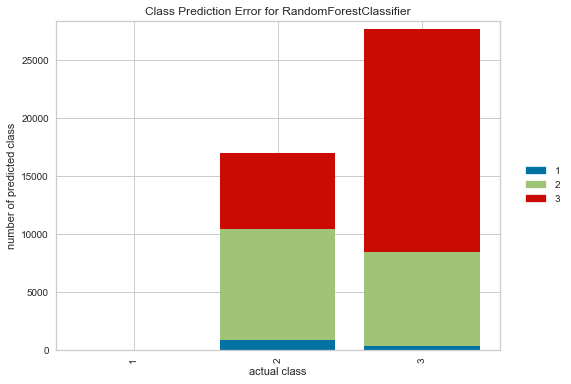

In [211]:
visualizer = ClassPredictionError(clf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Conclusiones y posibles mejoras del modelo

Como compañía de seguros estamos interesados en poder conocer de antemano si un cliente es propenso a tener accidentes de gravedad considerable para así descartarlo o ajustar el precio de la póliza convenientemente. En este caso, hemos diseñado un modelo que clasifica la gravedad de los accidentes ocurridos en base a una serie de características tanto del lugar donde se produjo el accidente como de los vehículos y heridos implicados en el mismo. También se ha incluido un mapa de calor donde se reflejan las **zonas con mayor tasa de accidentes graves**, con lo cual a los clientes que residan en esas zonas y sus condiciones coincidan con las definidas en el mapa se les podría **incrementar** el precio de la póliza.

Desde un principio observamos que los datos están desbalanceados, puesto que casi el **88% de los accidentes ocurridos son leves**, lo cual dificulta al modelo la clasificación correcta de la clase minoritaria. Sería conveniente también tener alguna variable que nos indique más detalles del momento del accidente, como **velocidad que llevaba el vehículo o si el conductor iba en estado de embriaguez por ejemplo.**

A pesar de tener un área bajo la curva ROC de 0.76 para la clase de accidentes graves, nuestro modelo solo es capaz de clasificar correctamente el **0.56% de los accidentes severos** en la muestra de test, con lo que necesitaríamos más observaciones de este tipo de siniestros, así como más variables que ayudaran a discriminarlos de una forma más precisa.

Otros posibles modelos sería el **modelo ARIMA** que se comentó anteriormente, para predecir el número de accidentes que van a ocurrir en una ventana de tiempo determinada, por ejemplo por tipo de vehículo y calibrar las pólizas de los mismos o también se podría diseñar un modelo no supervisado de **Clustering para poder agrupar y encontrar patrones en los clientes** que han sufrido un accidente grave, y tenerlo en cuenta de cara a calibrar el precio de su póliza.